# AI in BME- Group 4   
# Running XGBoost on Individual Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.3 MB/s eta 0:00:00


### Read in the Data

In [ ]:
df1= pd.read_csv("/content/drive/MyDrive/Project Group 4/Datasets/dataset1.csv")
df2= pd.read_csv("/content/drive/MyDrive/Project Group 4/Datasets/dataset2.csv")
df3= pd.read_csv("/content/drive/MyDrive/Project Group 4/Datasets/diabetes_prediction_dataset.csv")
df4= pd.read_csv("/content/drive/MyDrive/Project Group 4/Datasets/Dataset_of_Diabetes.csv")

In [ ]:
df1.head()

,CLASS,hypertension,Chol,CholCheck,BMI,smoking_history,Stroke,heart_disease,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Gender,AGE,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
df2.head()

,Id,blood_glucose_level,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,AGE,CLASS
0,1,148,72,35,0,33.6,0.627,50,1
1,2,85,66,29,0,26.6,0.351,31,0
2,3,183,64,0,0,23.3,0.672,32,1
3,4,89,66,23,94,28.1,0.167,21,0
4,5,137,40,35,168,43.1,2.288,33,1


In [ ]:
df3.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df4.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


### Dataset 1- XGBoost and Shap

In [ ]:
X1= df1.iloc[:, 1:]
y1= df1.iloc[:, 0]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model_1 = xgb.XGBClassifier()

model_1.fit(X1_train, y1_train)

# Predict on the testing data
y_pred_1 = model_1.predict(X1_test)

# Calculate accuracy on the testing data
accuracy_1 = accuracy_score(y1_test, y_pred_1)
print("Accuracy on test set:", accuracy_1)

# Perform 5-fold cross-validation on the training data
scores_1 = cross_val_score(model_1, X1_train, y1_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_1)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", np.mean(scores_1))
print("Standard deviation of accuracy:", np.std(scores_1))

precision_1 = precision_score(y1_test, y_pred_1)
recall_1 = recall_score(y1_test, y_pred_1)
f1_1 = f1_score(y1_test, y_pred_1)
specificity_1 = (confusion_matrix(y1_test, y_pred_1)[0, 0]) / (confusion_matrix(y1_test, y_pred_1)[0, :].sum())

print("Sensitivity (Recall) on test set:", recall_1)
print("Specificity on test set:", specificity_1)
print("F1 Score on test set:", f1_1)

# Confusion Matrix
conf_matrix_1 = confusion_matrix(y1_test, y_pred_1)
print("Confusion Matrix:")
print(conf_matrix_1)

# Classification Report
class_report_1 = classification_report(y1_test, y_pred_1)
print("Classification Report:")
print(class_report_1)


Accuracy on test set: 0.8667612740460423
Accuracy for each fold: [0.86353446 0.86565326 0.86429821 0.86520979 0.86385138]
Mean accuracy: 0.8645094180757578
Standard deviation of accuracy: 0.0008033741200096344
Sensitivity (Recall) on test set: 0.1733600114334715
Specificity on test set: 0.977685818148563
F1 Score on test set: 0.26409753973437844
Confusion Matrix:
[[42763   976]
 [ 5784  1213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.55      0.17      0.26      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736



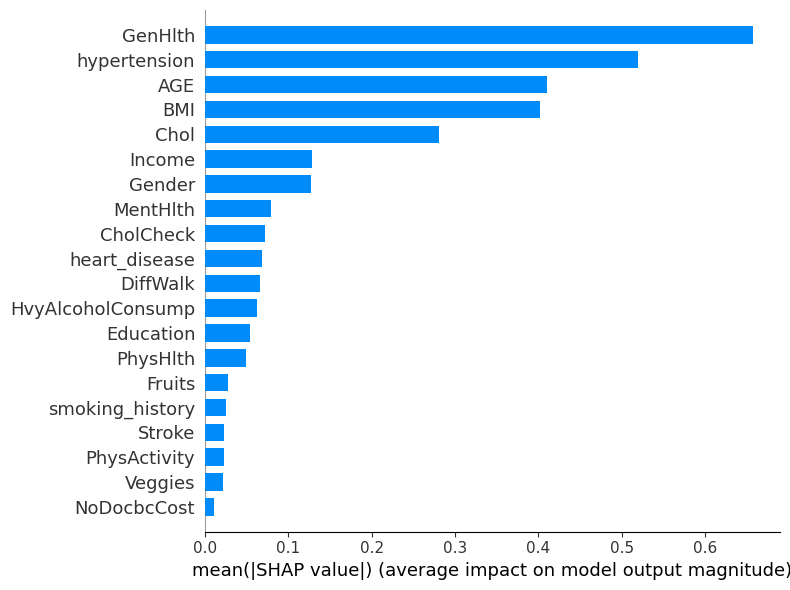

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model_1)
shap_values = explainer.shap_values(X1_train)
# shap.summary_plot(shap_values, X1_train, plot_type="bar")
shap.summary_plot(shap_values, X1_train, plot_type="bar", plot_size=[8,6])

### Dataset 2- XGBoost and Shap

In [ ]:
X2= df2.iloc[:, :-1]
y2= df2.iloc[:, -1]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model_2 = xgb.XGBClassifier()

model_2.fit(X2_train, y2_train)

# Predict on the testing data
y_pred_2 = model_2.predict(X2_test)

# Calculate accuracy on the testing data
accuracy_2 = accuracy_score(y2_test, y_pred_2)
print("Accuracy on test set:", accuracy_2)

scores_2 = cross_val_score(model_2, X2_train, y2_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_2)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", np.mean(scores_2))
print("Standard deviation of accuracy:", np.std(scores_2))

precision_2 = precision_score(y2_test, y_pred_2)
recall_2 = recall_score(y2_test, y_pred_2)
f1_2 = f1_score(y2_test, y_pred_2)
specificity_2 = (confusion_matrix(y2_test, y_pred_2)[0, 0]) / (confusion_matrix(y2_test, y_pred_2)[0, :].sum())

print("Sensitivity (Recall) on test set:", recall_2)
print("Specificity on test set:", specificity_2)
print("F1 Score on test set:", f1_2)

# Confusion Matrix
conf_matrix_2 = confusion_matrix(y2_test, y_pred_2)
print("Confusion Matrix:")
print(conf_matrix_2)

# Classification Report
class_report_2 = classification_report(y2_test, y_pred_2)
print("Classification Report:")
print(class_report_2)


Accuracy on test set: 0.9819494584837545
Accuracy for each fold: [0.9751693  0.98871332 0.98871332 0.97291196 0.97963801]
Mean accuracy: 0.9810291819453949
Standard deviation of accuracy: 0.006637088328871025
Sensitivity (Recall) on test set: 0.9625668449197861
Specificity on test set: 0.9918256130790191
F1 Score on test set: 0.9729729729729729
Confusion Matrix:
[[364   3]
 [  7 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.98      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554



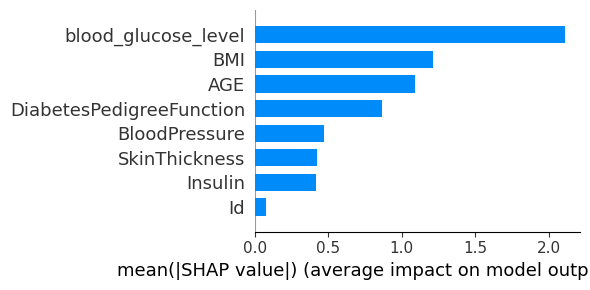

In [ ]:
explainer_2 = shap.TreeExplainer(model_2)
shap_values_2 = explainer_2.shap_values(X2_train)
# shap.summary_plot(shap_values, X1_train, plot_type="bar")
shap.summary_plot(shap_values_2, X2_train, plot_type="bar", plot_size=[6,3], title= "SHAP for Dataset 2", show= False)

### Dataset 3- XGBoost and Shap

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df3['smoking_history']= label_encoder.fit_transform(df3['smoking_history'])

df3['gender']= df3['gender'].replace({'Female': 1,'Male': 0, 'Other': 2})

X3= df3.iloc[:, :-1]
y3= df3.iloc[:, -1]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

model_3 = xgb.XGBClassifier()

model_3.fit(X3_train, y3_train)

# Predict on the testing data
y_pred_3 = model_3.predict(X3_test)

# Calculate accuracy on the testing data
accuracy_3 = accuracy_score(y3_test, y_pred_3)
print("Accuracy on test set:", accuracy_3)

scores_3 = cross_val_score(model_3, X3_train, y3_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_3)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", np.mean(scores_3))
print("Standard deviation of accuracy:", np.std(scores_3))

precision_3 = precision_score(y3_test, y_pred_3)
recall_3 = recall_score(y3_test, y_pred_3)
f1_3 = f1_score(y3_test, y_pred_3)
specificity_3 = (confusion_matrix(y3_test, y_pred_3)[0, 0]) / (confusion_matrix(y3_test, y_pred_3)[0, :].sum())

print("Sensitivity (Recall) on test set:", recall_3)
print("Specificity on test set:", specificity_3)
print("F1 Score on test set:", f1_3)

# Confusion Matrix
conf_matrix_3 = confusion_matrix(y3_test, y_pred_3)
print("Confusion Matrix:")
print(conf_matrix_3)

# Classification Report
class_report_3 = classification_report(y3_test, y_pred_3)
print("Classification Report:")
print(class_report_3)


Accuracy on test set: 0.97125
Accuracy for each fold: [0.9705625 0.9705    0.9706875 0.971875  0.9696875]
Mean accuracy: 0.9706625000000001
Standard deviation of accuracy: 0.0007011151831190125
Sensitivity (Recall) on test set: 0.6937939110070258
Specificity on test set: 0.9971572272031489
F1 Score on test set: 0.804753820033956
Confusion Matrix:
[[18240    52]
 [  523  1185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



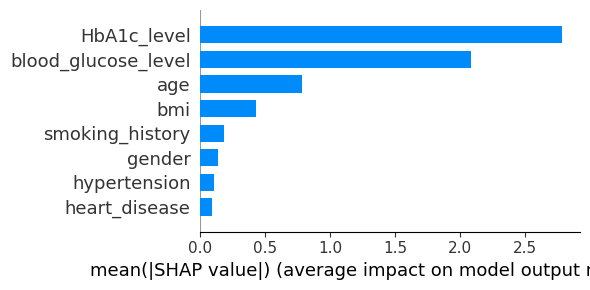

In [ ]:
explainer_3 = shap.TreeExplainer(model_3)
shap_values_3 = explainer_3.shap_values(X3_train)
# shap.summary_plot(shap_values, X1_train, plot_type="bar")
shap.summary_plot(shap_values_3, X3_train, plot_type="bar", plot_size=[6,3], title= "SHAP for Dataset 3", show= False)

### Dataset 4- XGBoost and Shap

In [ ]:
df4['CLASS']= df4['CLASS'].replace({'N': 0, 'N ': 0, 'Y': 1, 'Y ': 1,'P':2})
df4['Gender']= df4['Gender'].replace({'F': 1,'f': 1, 'M': 0})

X4= df4.iloc[:, :-1]
y4= df4.iloc[:, -1]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

model_4 = xgb.XGBClassifier()

model_4.fit(X4_train, y4_train)

# Predict on the testing data
y_pred_4 = model_4.predict(X4_test)

# Calculate accuracy on the testing data
accuracy_4 = accuracy_score(y4_test, y_pred_4)
print("Accuracy on test set:", accuracy_4)

scores_4 = cross_val_score(model_4, X4_train, y4_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_4)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", np.mean(scores_4))
print("Standard deviation of accuracy:", np.std(scores_4))

# Sensitivity, specificity, F1 score
precision_4 = precision_score(y4_test, y_pred_4, average='weighted')
recall_4 = recall_score(y4_test, y_pred_4, average='weighted')
f1_4 = f1_score(y4_test, y_pred_4, average='weighted')

# Specificity calculation
conf_matrix_4 = confusion_matrix(y4_test, y_pred_4)
specificity_4 = conf_matrix_4[0, 0] / (conf_matrix_4[0, 0] + conf_matrix_4[0, 1])

print("Sensitivity (Recall) on test set:", recall_4)
print("Specificity on test set:", specificity_4)
print("F1 Score on test set:", f1_4)

# Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_4)

# Classification Report
class_report_4 = classification_report(y4_test, y_pred_4)
print("Classification Report:")
print(class_report_4)


Accuracy on test set: 0.99
Accuracy for each fold: [1.      0.99375 0.9875  0.98125 0.98125]
Mean accuracy: 0.9887500000000001
Standard deviation of accuracy: 0.007288689868556645
Sensitivity (Recall) on test set: 0.99
Specificity on test set: 0.9523809523809523
F1 Score on test set: 0.99
Confusion Matrix:
[[ 20   1   0]
 [  1 172   0]
 [  0   0   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.99      0.99      0.99       173
           2       1.00      1.00      1.00         6

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200



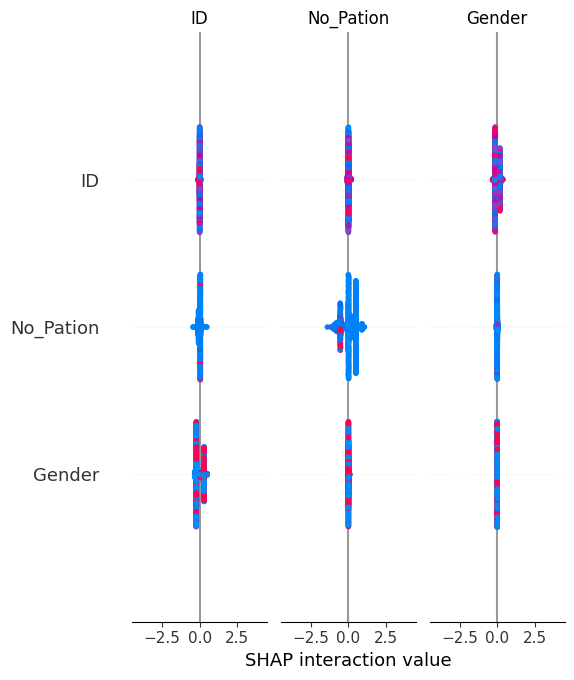

In [ ]:
explainer_4 = shap.TreeExplainer(model_4)
shap_values_4 = explainer_4.shap_values(X4_train)
# shap.summary_plot(shap_values, X1_train, plot_type="bar")
shap.summary_plot(shap_values_4, X4_train, plot_type="bar", plot_size=[6,3], title= "SHAP for Dataset 4", show= False)

In [ ]:
df4.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [ ]:
df4['CLASS']= df4['CLASS'].replace({'N': 0, 'N ': 0, 'Y': 1, 'Y ': 1,'P':1})
df4['Gender']= df4['Gender'].replace({'F': 1,'f': 1, 'M': 0})

X4= df4.iloc[:, :-1]
y4= df4.iloc[:, -1]

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

model_4 = xgb.XGBClassifier()

model_4.fit(X4_train, y4_train)

# Predict on the testing data
y_pred_4 = model_4.predict(X4_test)

# Calculate accuracy on the testing data
accuracy_4 = accuracy_score(y4_test, y_pred_4)
print("Accuracy on test set:", accuracy_4)

scores_4 = cross_val_score(model_4, X4_train, y4_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", scores_4)

# Print the mean accuracy and standard deviation
print("Mean accuracy:", np.mean(scores_4))
print("Standard deviation of accuracy:", np.std(scores_4))

# Sensitivity, specificity, F1 score
precision_4 = precision_score(y4_test, y_pred_4, average='weighted')
recall_4 = recall_score(y4_test, y_pred_4, average='weighted')
f1_4 = f1_score(y4_test, y_pred_4, average='weighted')

# Specificity calculation
conf_matrix_4 = confusion_matrix(y4_test, y_pred_4)
specificity_4 = conf_matrix_4[0, 0] / (conf_matrix_4[0, 0] + conf_matrix_4[0, 1])

print("Sensitivity (Recall) on test set:", recall_4)
print("Specificity on test set:", specificity_4)
print("F1 Score on test set:", f1_4)

# Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_4)

# Classification Report
class_report_4 = classification_report(y4_test, y_pred_4)
print("Classification Report:")
print(class_report_4)

Accuracy on test set: 0.99
Accuracy for each fold: [0.99375 1.      0.9875  0.99375 0.9875 ]
Mean accuracy: 0.9925
Standard deviation of accuracy: 0.004677071733467411
Sensitivity (Recall) on test set: 0.99
Specificity on test set: 0.9523809523809523
F1 Score on test set: 0.99
Confusion Matrix:
[[ 20   1]
 [  1 178]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.99      0.99      0.99       179

    accuracy                           0.99       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
y4.unique()

array([0, 1])

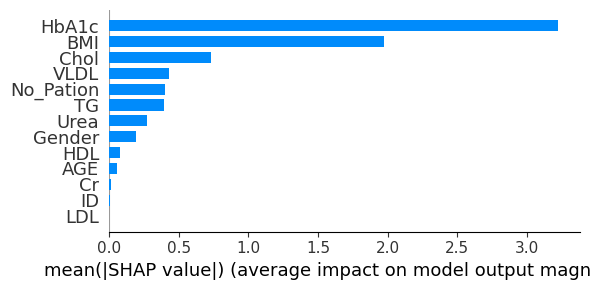

In [ ]:
explainer_4 = shap.TreeExplainer(model_4)
shap_values_4 = explainer_4.shap_values(X4_train)
# shap.summary_plot(shap_values, X1_train, plot_type="bar")
shap.summary_plot(shap_values_4, X4_train, plot_type="bar", plot_size=[6,3], title= "SHAP for Dataset 4", show= False)


In [ ]:
# print("Number of features in shap_values_4[0]:", shap_values_4.shape)
# print("Number of features in X4_train:", X4_train.shape[1])

Number of features in shap_values_4[0]: (800, 11, 3)
Number of features in X4_train: 11
